<a href="https://colab.research.google.com/github/preethamlv/TEAM-B1/blob/fraud-detection/FraudDetection/ML_models/Supervised_Learning/LogisticRegressionModel/Fraud_detection_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Topic - Applying Logistics Regression Algorithim on the dataset
# Author-Subhankar Biswas
# Data- 25/06/2021
# Description - In this notebook we will implement Logistic Regression Algorithim on the Dataset and Analyse its results

# Mounting the Drive

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Importing Python libraries

In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.linear_model import LogisticRegression
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import joblib
from sklearn.metrics import confusion_matrix,accuracy_score, roc_curve, auc,classification_report,roc_auc_score

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, auc,roc_auc_score,roc_curve,precision_recall_curve,jaccard_score,f1_score,classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
%matplotlib inline

# Importing test and train dataset

In [3]:
data_train = pd.read_csv('/content/gdrive/MyDrive/MyTranscation/preprocessed_Traindata1.csv') #This is the train dataset

In [4]:
data_test = pd.read_csv('/content/gdrive/MyDrive/MyTranscation/preprocessed_Testdata1.csv') #this is the test datasest

In [5]:
data_test.columns #columns in the dataset

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud', 'week_day', 'year_month', 'age',
       'category_food_dining', 'category_gas_transport',
       'category_grocery_net', 'category_grocery_pos',
       'category_health_fitness', 'category_home', 'category_kids_pets',
       'category_misc_net', 'category_misc_pos', 'category_personal_care',
       'category_shopping_net', 'category_shopping_pos', 'category_travel',
       'gender_M', 'week_day_Monday', 'week_day_Saturday', 'week_day_Sunday',
       'week_day_Thursday', 'week_day_Tuesday', 'week_day_Wednesday', 'dist',
       'val_aggr', 'trans_date', 'hist_trans_of_60d',
       'hist_trans_of_60d_amt_avg', 'hist_trans_of_24H',
       'hist_trans_of_24H_fraud', 'hist_trans_of_24H_avg', 'hist_trans_of_2H',
       'tr

# Selecting specific features from them

In [7]:
#selecting few columns that are having high co relation with the is_fraud clumns

cols = ['amt','trans_hour',
       'age', 'category_food_dining', 'category_gas_transport',
       'category_grocery_net', 'category_grocery_pos',
       'category_health_fitness', 'category_home', 'category_kids_pets',
       'category_misc_net', 'category_misc_pos', 'category_personal_care',
       'category_shopping_net', 'category_shopping_pos', 'category_travel',
       'gender_M','week_day_Monday', 'week_day_Saturday', 'week_day_Sunday',
       'week_day_Thursday', 'week_day_Tuesday','dist','hist_trans_of_60d',
       'hist_trans_of_60d_amt_avg', 'hist_trans_of_24H',
       'hist_trans_of_24H_fraud','is_fraud','hist_trans_of_24H_avg']

In [8]:
data_test=data_test[cols] 

In [9]:
data_train = data_train[cols]

In [10]:
#splitting train data
X_train,y_train = data_train.drop('is_fraud',1),data_train['is_fraud']

In [11]:
#splitting the test data
X_test,y_test = data_test.drop('is_fraud',1),data_test['is_fraud']

In [12]:
len(X_train.columns)

28

# Analysing the Dataset

In [13]:
Counter(y_train) #count no of 1 and 0 in the is_fraud column 

Counter({0: 1289289, 1: 7506})

In [14]:
X_train.dtypes #data types of the columns

amt                          float64
trans_hour                     int64
age                          float64
category_food_dining           int64
category_gas_transport         int64
category_grocery_net           int64
category_grocery_pos           int64
category_health_fitness        int64
category_home                  int64
category_kids_pets             int64
category_misc_net              int64
category_misc_pos              int64
category_personal_care         int64
category_shopping_net          int64
category_shopping_pos          int64
category_travel                int64
gender_M                       int64
week_day_Monday                int64
week_day_Saturday              int64
week_day_Sunday                int64
week_day_Thursday              int64
week_day_Tuesday               int64
dist                         float64
hist_trans_of_60d            float64
hist_trans_of_60d_amt_avg    float64
hist_trans_of_24H            float64
hist_trans_of_24H_fraud      float64
h

# Scaling the datasets

In [15]:
scaler = StandardScaler() #importing standard scaler

In [16]:
#fitting train data to scaler and tranforming the test best on that 
X_train,X_test = scaler.fit_transform(X_train),scaler.transform(X_test) 

In [ ]:
joblib.dump(scaler,'/content/scaler1.pkl') #saving the scaler model

['/content/scaler1.pkl']

# Data Balancing using SMOTE

In [ ]:
Counter(y_train)

Counter({0: 1289209, 1: 7506})

In [ ]:
Counter(y_test)

Counter({0: 553622, 1: 2145})

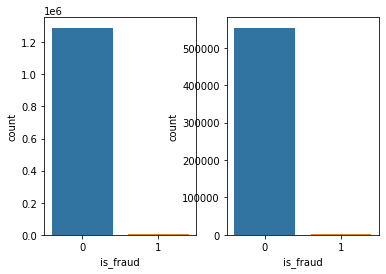

In [ ]:
plt.subplot(1,2,1)
sns.countplot(x="is_fraud",data=data_train)
plt.subplot(1,2,2)
sns.countplot(x="is_fraud",data=data_test)

we can see that both the test and train dataset are highly imbalanced

In [17]:
model = LogisticRegression(random_state=42)

In [20]:
over = SMOTE(sampling_strategy=0.2)
X_train_res,y_train_res = over.fit_sample(X_train,y_train.ravel())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
Counter(y_train_res)

Counter({0: 1289209, 1: 257841})

In [21]:
logreg = LogisticRegression(C=0.01,penalty='l2',solver='liblinear')

Resampling the training set

In [22]:
logreg.fit(X_train_res,y_train_res)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
y_pred_res = logreg.predict(X_test)

In [26]:
accuracy_score(y_pred_res,y_test)

0.9959720290791076

In [27]:
print(classification_report(y_test,y_pred_res))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553718
           1       0.49      0.89      0.63      2145

    accuracy                           1.00    555863
   macro avg       0.74      0.94      0.81    555863
weighted avg       1.00      1.00      1.00    555863



In [ ]:
jaccard_score(y_pred_res,y_test)

0.4831718510963794

In [28]:
print(confusion_matrix(y_test,y_pred_res))

[[551722   1996]
 [   243   1902]]


# Over and under sampling

In [39]:
logreg_over_under = LogisticRegression(C=0.01,penalty='l2',solver='liblinear')

In [40]:
X_train_over_under,y_train_over_under =under.fit_resample(X_train_res,y_train_res)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [41]:
Counter(y_train_over_under)

Counter({0: 515714, 1: 257857})

In [42]:
logreg_over_under.fit(X_train_over_under,y_train_over_under)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [43]:
y_pred_over_under = logreg_over_under.predict(X_test)

In [44]:
accuracy_score(y_test,y_pred_over_under)

0.9931385971003647

In [46]:
print(classification_report(y_test,y_pred_over_under))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00    553718
           1       0.35      0.93      0.51      2145

    accuracy                           0.99    555863
   macro avg       0.68      0.96      0.75    555863
weighted avg       1.00      0.99      0.99    555863



# UnderSampling Using Random UnderSampler

In [29]:
#doing under sampling using imblearn.RandomUnderSampler with sampling strategy 0.5 that will make 0 cols twince of 1s for is_fraus

under = RandomUnderSampler(sampling_strategy=0.5)  


In [30]:
#fitting the train data to under Sampler
X_train_under,y_train_under =under.fit_resample(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


# Under Sampeled Dataset Hyper Tunning

In [ ]:
#define a model
model_under = LogisticRegression() 

#define grid params for different model parameters
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)            

In [ ]:
#fitting the grid on the under sampled data
grid_search.fit(X_train_over_under,y_train_over_under)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
             error_score=0,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=42, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01], 'penalty': ['l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [ ]:
#checkig the best parameters and the best score
print(grid_search.best_params_)
print(grid_search.best_score_)

{'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.9695350582862866


In [31]:
#fittig the optimal params to the model

lr_under = LogisticRegression(C= 100, penalty= 'l2', solver= 'newton-cg')

In [32]:
#training on the under sampled data

lr_under.fit(X_train_under,y_train_under)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
#predicting the data
y_pred_under = lr_under.predict(X_test)

In [34]:
accuracy_score(y_test,y_pred_under)

0.9936585093809086

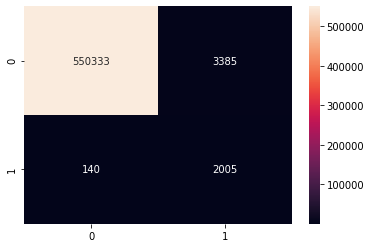

In [36]:
sns.heatmap(confusion_matrix(y_test,y_pred_under),annot=True,fmt='d')

False Negetive Rate  is high so under sampling can be used

In [38]:
print(classification_report(y_test,y_pred_under))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00    553718
           1       0.37      0.93      0.53      2145

    accuracy                           0.99    555863
   macro avg       0.69      0.96      0.76    555863
weighted avg       1.00      0.99      1.00    555863



Bad Recall value so model not acceptable

# Tunning the hyperParameter of Logistic Regression



In [ ]:
#defining the model
model = LogisticRegression()

#defining list of diferent model params to be used in the grid search
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)            

In [ ]:
#fitting the grid on the imbalanced data
grid_search.fit(X_train,y_train)

In [ ]:
#best params for the best accuracy score
print(grid_search.best_params_)
print(grid_search.best_score_)

{'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
0.9987923329534113


In [ ]:
#setting the best parameters
lr = LogisticRegression(C=0.01,penalty='l2',solver='liblinear')

In [ ]:
#training the logistic regression model
lr.fit(X_train,y_train)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#predicting the result
y_pred = lr.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.9992784746125625

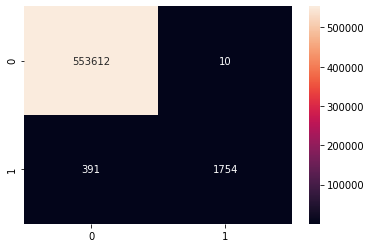

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d')

very high False Positive Rate so model is not good to go with

In [ ]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    554003
           1       0.82      0.99      0.90      1764

    accuracy                           1.00    555767
   macro avg       0.91      1.00      0.95    555767
weighted avg       1.00      1.00      1.00    555767



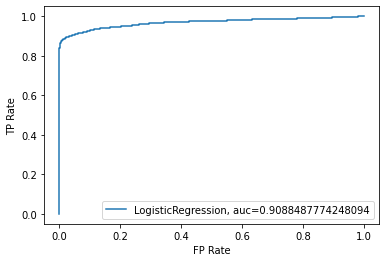

In [ ]:
#plotting the roc curve y axis is True positive rate x axis as false positive rate

y_pred_probability = lr.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_probability)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="LogisticRegression, auc="+str(auc))
plt.ylabel('TP Rate')
plt.xlabel('FP Rate')
plt.legend(loc=4)
plt.show()

ACUROC Curve is showing a high area

# Exporting the Model in .pkl format

In [ ]:
#savig the model using joblib

joblib.dump(lr,'/content/LogisticRegressionModel1.pkl')

['/content/LogisticRegressionModel1.pkl']

# Training on the Concatinated Dataset 

# Loading the train dataset

In [ ]:
df_concat = pd.read_csv('/content/gdrive/MyDrive/Transaction data/Copy of preprocessed_Traindata.csv')

In [ ]:
len(df_concat)

1296715

In [ ]:
df_concat.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,week_day,year_month,age,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M,week_day_Monday,week_day_Saturday,week_day_Sunday,week_day_Thursday,week_day_Tuesday,week_day_Wednesday,dist,val_aggr,trans_date,hist_trans_of_60d,hist_trans_of_60d_amt_avg,hist_trans_of_24H,hist_trans_of_24H_fraud,hist_trans_of_2H,trans_hour
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09 00:00:00,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,Tuesday,2019-01,31.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,5769.599637,1,2019-01-01,1.0,4.970000,6.0,0.0,0.0,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21 00:00:00,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,Tuesday,2019-01,41.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,5254.925202,1,2019-01-01,1.0,47.488421,1.0,0.0,0.0,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19 00:00:00,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,Tuesday,2019-01,57.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,5265.935520,1,2019-01-01,8.0,377.925000,5.0,0.0,0.0,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12 00:00:00,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,Tuesday,2019-01,52.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,5377.625588,1,2019-01-01,1.0,45.000000,5.0,0.0,0.0,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28 00:00:00,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,Tuesday,2019-01,33.0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,5833.347119,1,2019-01-01,1.0,41.960000,6.0,0.0,0.0,0


# Loading Test Data

In [ ]:
df_concat_test = pd.read_csv('/content/gdrive/MyDrive/Transaction data/Copy of preprocessed_Testdata.csv')

# test and train Dataset

In [ ]:
data_train = df_concat[cols]

In [ ]:
data_test = df_concat_test[cols]

In [ ]:
X_train,y_train = data_train.drop('is_fraud',1),data_train['is_fraud']

In [ ]:
X_test,y_test = data_test.drop('is_fraud',1),data_test['is_fraud']

In [ ]:
X_test.dtypes

amt                          float64
city_pop                       int64
trans_hour                     int64
age                          float64
category_food_dining           int64
category_gas_transport         int64
category_grocery_net           int64
category_grocery_pos           int64
category_health_fitness        int64
category_home                  int64
category_kids_pets             int64
category_misc_net              int64
category_misc_pos              int64
category_personal_care         int64
category_shopping_net          int64
category_shopping_pos          int64
category_travel                int64
gender_M                       int64
week_day_Monday                int64
week_day_Saturday              int64
week_day_Sunday                int64
week_day_Thursday              int64
week_day_Tuesday               int64
dist                         float64
hist_trans_of_60d            float64
hist_trans_of_60d_amt_avg    float64
hist_trans_of_24H            float64
h

# Scaling the data

In [ ]:
scaler= StandardScaler()

In [ ]:
X_train,X_test = scaler.fit_transform(X_train),scaler.transform(X_test)

In [ ]:
joblib.dump(scaler,'/content/scaler.pkl') #saving the scaler model

['/content/scaler.pkl']

# Making Model

In [ ]:
logreg  = LogisticRegression(C=0.01,penalty='l2',solver='liblinear')

In [ ]:
logreg.fit(X_train,y_train)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = logreg.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553622
           1       0.99      0.82      0.90      2145

    accuracy                           1.00    555767
   macro avg       1.00      0.91      0.95    555767
weighted avg       1.00      1.00      1.00    555767



In [ ]:
confusion_matrixy_test)

array([[553612,    384],
       [    10,   1761]])